In [1]:
import numpy as np
import pandas as pd

songs=pd.read_csv('data/tracks.csv')
songs=songs.sample(25000)

In [2]:
songs_for_dec_trees = songs.copy() 
songs_for_dec_trees.set_index('id',inplace=True)

In [3]:
def drop_columns(dataframe,to_be_deleted):
    dataframe.drop(to_be_deleted, axis=1, inplace=True)
to_be_deleted = ['id_artists', 'release_date','artists','name'] 

In [4]:
# songs_for_dec_trees['release_date'] = pd.to_datetime(songs_for_dec_trees['release_date'], errors='coerce')
songs_for_dec_trees['year'] = pd.DatetimeIndex(songs_for_dec_trees['release_date']).year
songs_for_dec_trees['month'] = pd.DatetimeIndex(songs_for_dec_trees['release_date']).month

In [5]:
drop_columns(songs_for_dec_trees,to_be_deleted)#delete columns

In [6]:
from sklearn import preprocessing

def scale_whole_df_except_valence():
    valence_only = songs_for_dec_trees['valence']
    del songs_for_dec_trees["valence"]

    x = songs_for_dec_trees #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    songs_for_dec_trees[songs_for_dec_trees.columns] = min_max_scaler.fit_transform(songs_for_dec_trees[songs_for_dec_trees.columns].to_numpy())
    songs_for_dec_trees['valence'] = valence_only
scale_whole_df_except_valence()

In [7]:
songs_for_dec_trees["key"] = songs_for_dec_trees["key"].astype("category")
songs_for_dec_trees = pd.get_dummies(songs_for_dec_trees, columns=["key"])
songs_for_dec_trees.head()

,popularity,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,...,key_0.18181818181818182,key_0.2727272727272727,key_0.36363636363636365,key_0.4545454545454546,key_0.5454545454545454,key_0.6363636363636364,key_0.7272727272727273,key_0.8181818181818182,key_0.9090909090909092,key_1.0
id,,,,,,,,,,,,,,,,,,,,,
2U1ucjQui6SBjirCgqqcud,0.56,0.040805,0.0,0.492886,0.490,0.836027,1.0,0.079051,0.661647,0.000067,...,0,0,0,1,0,0,0,0,0,0
0vNDwA6xPhlWI72akZdAWW,0.01,0.038001,0.0,0.476626,0.138,0.720856,1.0,0.113519,0.994980,0.000005,...,0,1,0,0,0,0,0,0,0,0
42nIs6Yh26PZ3E26YobANa,0.38,0.014980,0.0,0.622967,0.416,0.805216,0.0,0.557276,0.119478,0.000000,...,0,0,0,1,0,0,0,0,0,0
5zOVcfUnFakO1GTXwEtTSz,0.01,0.024967,0.0,0.458333,0.891,0.919403,1.0,0.112487,0.255020,0.000165,...,0,0,0,0,0,0,0,1,0,0
2K5CxepRrAWH6GeF1PRkoN,0.44,0.038740,0.0,0.765244,0.882,0.859814,1.0,0.034572,0.135542,0.268806,...,0,0,0,0,0,1,0,0,0,0


In [8]:
songs_for_dec_trees.dropna(inplace=True)

In [17]:
len(songs_for_dec_trees.columns)

28

In [9]:
starting_key = 0 
for i in range (16, 28):
    songs_for_dec_trees = songs_for_dec_trees.rename(columns={songs_for_dec_trees.columns[i]: 'key_%d' % starting_key})
    starting_key = starting_key  + 1 

In [10]:
x = songs_for_dec_trees['valence']
del songs_for_dec_trees["valence"]
songs_for_dec_trees['valence'] = x

# IT BEGINS

In [11]:
import numpy as np
labels = np.array(songs_for_dec_trees['valence'])
features= songs_for_dec_trees.drop('valence', axis = 1)
feature_list = list(features.columns)
features = np.array(features)

In [12]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [13]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)

In [14]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 100, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5]
min_samples_leaf = [1, 2, 4]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }


In [15]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=50, random_state=42, n_jobs = -1)
# Fit the random search model

In [16]:
# rf_random.fit(train_features, train_labels)

In [17]:
# rf_random.best_params_


GRID SEARCH

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [60,70,82,90],
    'min_samples_leaf': [1,2],
    'min_samples_split': [2],
    'n_estimators': [900, 944, 1200,  1500]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

34 lepta 96 fits

In [19]:
grid_search.fit(train_features, train_labels)


Fitting 3 folds for each of 32 candidates, totalling 96 fits


exception calling callback for <Future at 0x1c2cff489d0 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "C:\Users\Νίκος\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "C:\Users\Νίκος\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\parallel.py", line 359, in __call__
    self.parallel.dispatch_next()
  File "C:\Users\Νίκος\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\parallel.py", line 794, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "C:\Users\Νίκος\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Νίκος\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 60,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1500}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=60, n_estimators=1500)

In [ ]:

final_model = grid_search.best_estimator_



EVALUATE

MAX DEPTH: 82 
MIN SAMPLES: 1 
MIN SPLIT: 2 
N_ESTIMATORS: 944 

In [ ]:
from sklearn.metrics import mean_absolute_error
def evaluate(model,test_features,test_labels):
    pred_labels = model.predict(test_features)
    errors = abs(pred_labels-test_labels)
    mape  = 100*np.mean(errors/test_labels)
    accuracy = 100 - mape 
    # print('mean_absolute_errorrrrr',mean_absolute_error(test_labels, pred_labels))

    print('Mean Absolut Error: {:0.4f} degrees.'.format(np.mean(errors)))
    
    return accuracy

In [ ]:
grid_final_accuracy = evaluate(final_model, test_features, test_labels)



mean_absolute_errorrrrr 0.10644103748586665
Model Performance
Average Error: 0.1064 degrees.
Accuracy = nan%.


C:\Users\3E30~1\AppData\Local\Temp/ipykernel_25800/2364971662.py:5: RuntimeWarning: divide by zero encountered in true_divide
  mape  = 100*np.mean(errors/test_labels)
C:\Users\3E30~1\AppData\Local\Temp/ipykernel_25800/2364971662.py:5: RuntimeWarning: invalid value encountered in true_divide
  mape  = 100*np.mean(errors/test_labels)


In [ ]:
best_random = rf_random.best_estimator_
accuracy = evaluate(best_random, test_features, test_labels)

NameError: name 'best_random' is not defined

In [ ]:
rf_random.best_estimator_.feature_importances_

In [ ]:
features = songs_for_dec_trees.columns
features=features.tolist()
features.remove('valence')

importances = final_model.feature_importances_
indices = np.argsort(importances)

In [ ]:
indices = indices[8:]

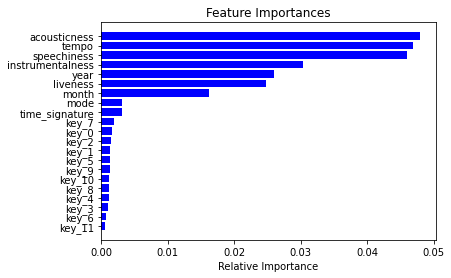

In [ ]:
import matplotlib.pyplot as plt
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show() 